<a href="https://colab.research.google.com/github/lucasherrera-wq/Portafolio/blob/main/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip install wbgapi

In [11]:
from google.colab import drive
import sys

# 1. Conectamos Drive
drive.mount('/content/drive')

# 2. LA CORRECCIÓN: Agregamos la tilde en "Economía"
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CD para la Economía')

# 3. Importamos el archivo
import my_func as fn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}

In [13]:
import wbgapi as wb
import pandas as pd
import numpy as np

# 1. DESCARGAR DATOS
print("Iniciando descarga...")
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

# 2. LIMPIAR
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

# 3. CLASIFICAR
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

# 4. MOSTRAR RESULTADO
print("\n¡Proceso terminado! Aquí están las primeras filas:")
df_wb_raw.head()

Iniciando descarga...
Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC'

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,2.052982,...,NaN,NaN,65.013,62.775,60.226,NaN,NaN,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,4.040607,...,NaN,NaN,68.673,66.349,63.936,NaN,NaN,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.769072,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.496492,...,36.077468,29.637136,79.264,74.588,69.877,NaN,NaN,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.942088,...,NaN,NaN,73.927,71.477,69.445,NaN,NaN,NaN,NaN,45.7313


--- 1. Estadísticas Descriptivas ---


,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SL.TLF.TOTL.FE.ZS,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
count,197.000000,1.970000e+02,1.970000e+02,197.000000,1.970000e+02,197.000000,196.000000,1.960000e+02,196.000000,173.000000,...,121.000000,121.000000,197.000000,197.000000,197.000000,0.0,0.0,57.000000,57.000000,176.000000
mean,1.188165,4.020363e+07,1.998092e+07,49.969112,2.022271e+07,50.030888,1.884229,2.309944e+07,61.839464,41.898364,...,61.064128,45.387218,76.063563,73.413980,70.842863,NaN,NaN,87.190260,88.240505,72.206821
std,1.587514,1.488468e+08,7.269947e+07,3.000380,7.616069e+07,3.000380,1.731087,8.045734e+07,23.197602,9.018598,...,35.914408,28.214202,7.197387,7.049386,7.058500,NaN,NaN,13.774667,12.542169,24.267760
min,-8.423008,9.816000e+03,4.795000e+03,28.483741,5.021000e+03,45.079120,-8.171607,6.502000e+03,13.723000,6.846247,...,4.663074,2.806122,54.743000,54.462000,53.195000,NaN,NaN,16.697100,19.497300,11.078400
25%,0.286976,1.384286e+06,6.912040e+05,49.649835,6.977740e+05,48.805591,0.661604,9.044855e+05,44.094000,40.069279,...,29.843470,19.746140,70.726000,67.689000,65.341000,NaN,NaN,84.786500,86.108800,58.267025
50%,1.138185,7.364438e+06,3.753089e+06,50.326894,3.611349e+06,49.673106,1.788896,4.462429e+06,64.102500,45.081945,...,63.110668,44.166088,77.418000,74.183780,70.532000,NaN,NaN,89.829000,90.538300,81.541050
75%,2.195243,2.969461e+07,1.423210e+07,51.194409,1.427923e+07,50.350165,2.969412,1.424310e+07,81.559500,47.539585,...,89.550217,63.487751,81.700000,78.473171,75.800000,NaN,NaN,94.406300,95.100000,90.016475
max,6.527050,1.438070e+09,6.961863e+08,54.920880,7.418833e+08,71.516259,7.265073,9.108954e+08,100.000000,54.670843,...,171.113083,159.586578,88.090000,85.247317,82.700000,NaN,NaN,100.000000,100.000000,100.000000



--- 2. Distribución del PIB (Categorías) ---


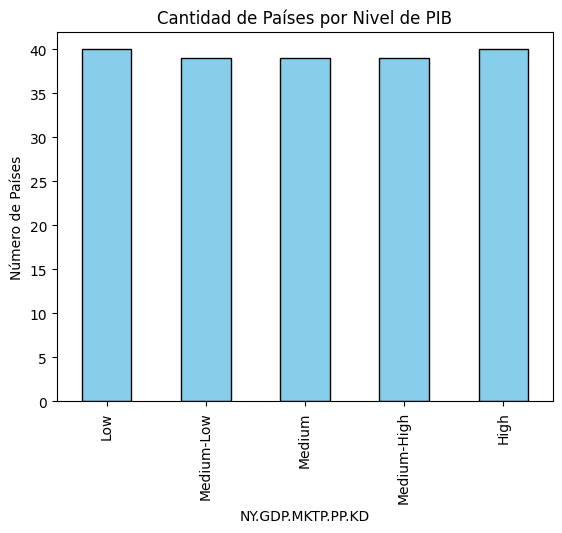


--- 3. Mapa Mundial del PIB ---


In [14]:
import matplotlib.pyplot as plt
import plotly.express as px

# 1. TABLA DE ESTADÍSTICAS (Media, Mediana, Máximo, Mínimo)
# El examen pide: "Generar una tabla de estadísticas descriptivas"
print("--- 1. Estadísticas Descriptivas ---")
display(df_wb_raw.describe())

# 2. GRÁFICO DEL PIB (Histograma/Barras)
# El examen pide: "Mostrar la distribución del PIB (variable objetivo)"
# Como ya convertimos el PIB a categorías (Bajo, Medio, Alto), hacemos un gráfico de barras.
print("\n--- 2. Distribución del PIB (Categorías) ---")
conteo_pib = df_wb_raw['NY.GDP.MKTP.PP.KD'].value_counts().sort_index()
conteo_pib.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Cantidad de Países por Nivel de PIB")
plt.ylabel("Número de Países")
plt.show()

# 3. MAPA DEL MUNDO
# El examen pide: "Mapa con la distribución del PIB"
print("\n--- 3. Mapa Mundial del PIB ---")
fig = px.choropleth(df_wb_raw,
                    locations="country",        # Usa el código ISO del país (ej: CHL, USA)
                    color="NY.GDP.MKTP.PP.KD",  # Pinta según si es Alto, Medio o Bajo
                    hover_name="Country",       # Al pasar el mouse muestra el nombre
                    title="Distribución Mundial del PIB (Categorías)",
                    color_discrete_sequence=px.colors.qualitative.Safe)
fig.show()